<a href="https://colab.research.google.com/github/fhzh123/CAU_mAI/blob/main/AI%ED%95%B5%EC%8B%AC%EB%8F%99%ED%96%A5_%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군AI교육지원사업

## WEEK3 - Third class

### Google Drive와의 연동

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Image 다운로드

실습에 사용할 이미지를 다운로드 받겠습니다.

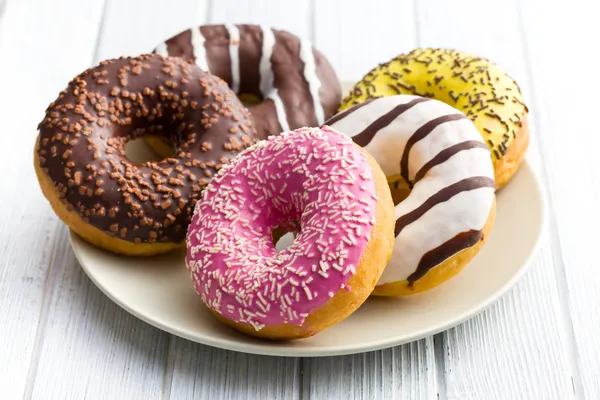

In [3]:
import os
from PIL import Image

# 다운받을 이미지 url
url = "https://st.depositphotos.com/1007298/2525/i/600/depositphotos_25259415-stock-photo-various-donuts.jpg"

# curl 요청
os.system("curl " + url + " > test.jpg")

# 저장 된 이미지 확인
img = Image.open("test.jpg")
img

### Image 열기

실습에 사용할 라이브러리들을 import해줍니다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_test = Image.open("test.jpg")
image_np = np.array(image_test)

In [6]:
# Checking the type of the array
print(type(image_np))  # <class 'numpy.ndarray'>
# Checking the shape of the array
print(image_np.shape)  # (400, 600, 3)

<class 'numpy.ndarray'>
(400, 600, 3)


In [7]:
# 이미지를 채널별로 분리합니다.
channel_0 = image_np[:, :, 0]
channel_1 = image_np[:, :, 1]
channel_2 = image_np[:, :, 2]

Text(0.5, 1.0, 'Original image')

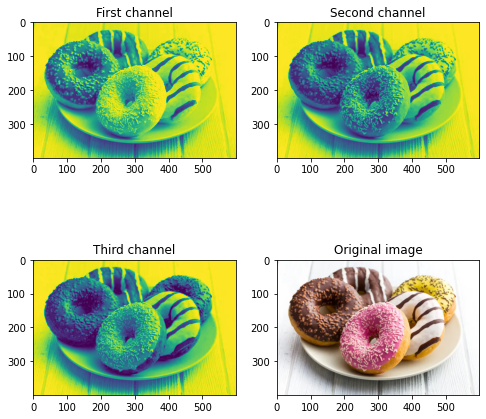

In [8]:
# 모든 채널을 개별적으로 도식화하기 위해 subplot 틀을 만들어둡니다.
figure_0, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax0, ax1, ax2, ax3 = ax.flatten()

# Adjusting first subplot
ax0.imshow(channel_0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_title('First channel')

# Adjusting second subplot
ax1.imshow(channel_1)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Second channel')

# Adjusting third subplot
ax2.imshow(channel_2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Third channel')

# Adjusting fourth subplot
ax3.imshow(image_np)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Original image')

### Numpy를 활용한 Convolution 연산

동일한 크기의 feature map (convolved 출력 이미지)를 얻기 위해서 그에 맞게 hyper-parameter를 설정합니다.

필터사이즈 = 3 \\
스트라이드 (슬라이딩 스텝) = 1 \\
패딩 = 1 \\

최종적으로 출력 이미지의 크기는 다음과 같습니다.

Out = (Width_In - K_size + 2*Pad)/Step + 1

In [9]:
# 입력 이미지의 첫번째 채널을 배열로 사용하도록 하겠습니다.
input_image = image_np[:, :, 0]
# 크기를 확인해봅니다.
print(input_image.shape)  # (400, 600)

(400, 600)


In [10]:
# 패딩을 위해 0 값을 추가해주도록 하겠습니다. 이 때 Numpy의 pad함수를 활용하겠습니다.
input_image_with_pad = np.pad(input_image, (1, 1), mode='constant', constant_values=0)
# 크기를 확인해봅니다.
print(input_image_with_pad.shape)  # (1282, 832)

(402, 602)


In [11]:
# 3x3 'identity' 필터를 정의하겠습니다.
filter_0 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
# 크기를 확인해봅니다.
print(filter_0.shape)  # (3, 3)

(3, 3)


In [12]:
output_image = np.zeros(input_image.shape)

# 컨볼루션 연산을 구현하겠습니다.
for i in range(input_image_with_pad.shape[0] - 2):
    for j in range(input_image_with_pad.shape[1] - 2):
        # 패드 프레임으로 입력 이미지에서 3x3패치를 추출하겠습니다.
        patch_from_input_image = input_image_with_pad[i:i+3, j:j+3]
        # 각 요소별로 곱셈 및 합산을 적용합니다 -> 이것이 convolution 연산입니다.
        output_image[i, j] = np.sum(patch_from_input_image * filter_0)

# 출력 이미지와 입력 이미지가 같은지 확인합니다.
print(np.array_equal(input_image, output_image))  # True

True


다양한 필터를 가지고 convolution 연산을 진행해보겠습니다.

In [13]:
filter_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
filter_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
filter_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

print(filter_1.shape, filter_2.shape, filter_3.shape)  # (3, 3) (3, 3) (3, 3)

(3, 3) (3, 3) (3, 3)


In [14]:
# 255 이상의 값이 나타나는 것을 방지하고 이미지 픽셀의 값을 0~255 범위로 유지하기 위해 아래의 함수를 정의합니다.
def values_for_image_pixels(x_array):
    result_array = np.zeros(x_array.shape)
    # 주어진 배열의 모든 요소를 통과시킵니다.
    for i in range(x_array.shape[0]):
        for j in range(x_array.shape[1]):
            # 요소가 [0, 255] 범위에 있는지 확인합니다.
            if 0 <= x_array[i, j] <= 255:
                result_array[i, j] = x_array[i, j]
            elif x_array[i, j] < 0:
                result_array[i, j] = 0
            else:
                result_array[i, j] = 255

    return result_array

In [15]:
output_image_1 = np.zeros(input_image.shape)
output_image_2 = np.zeros(input_image.shape)
output_image_3 = np.zeros(input_image.shape)

# 아까와 똑같이 convolution연산을 진행해주도록 하겠습니다.
for i in range(input_image_with_pad.shape[0] - 2):
    for j in range(input_image_with_pad.shape[1] - 2):
        patch_from_input_image = input_image_with_pad[i:i+3, j:j+3]
        # With filter_1
        output_image_1[i, j] = np.sum(patch_from_input_image * filter_1)
        # With filter_2
        output_image_2[i, j] = np.sum(patch_from_input_image * filter_2)
        # With filter_3
        output_image_3[i, j] = np.sum(patch_from_input_image * filter_3)

# 음수 값과 255보다 큰 값을 제거하는 함수를 적용시킵니다.
output_image_1 = values_for_image_pixels(output_image_1)
output_image_2 = values_for_image_pixels(output_image_2)
output_image_3 = values_for_image_pixels(output_image_3)

각 convolution filter별 결과들을 시각화해보도록 하겠습니다.

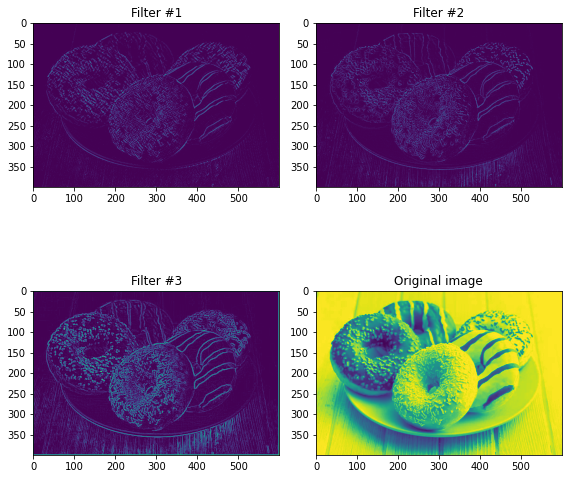

In [16]:
figure_1, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax0, ax1, ax2, ax3 = ax.flatten()

# Adjusting first subplot
ax0.imshow(output_image_1)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_title('Filter #1')

# Adjusting second subplot
ax1.imshow(output_image_2)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Filter #2')

# Adjusting third subplot
ax2.imshow(output_image_3)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Filter #3')

# Adjusting fourth subplot
ax3.imshow(input_image)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Original image')

# Function to make distance between figures
plt.tight_layout()
# Giving the name to the window with figure
figure_1.canvas.set_window_title('Convolution with filters for edge detection')
# Showing the plots
plt.show()

### PyTorch를 활용한 Convolution 연산

#### CIFAR10 데이터셋

이번 실습에서는 10개의 클래스에 대해서 60,000개의 32x32픽셀 이미지를 가지고 있는 CIFAR10데이터세트를 활용하도록 하겠습니다.

아래의 이미지는 해당 CIFAR10데이터세트의 샘플 이미지들입니다.

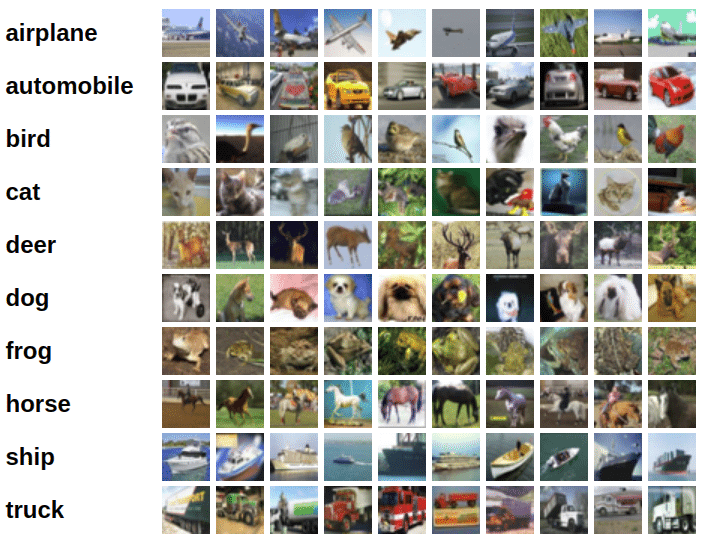

이미지는 비행기, 자동차(트럭이나 픽업 트럭 제외), 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭(픽업 트럭 제외)의 10가지 클래스 중 하나로 레이블이 지정됩니다.

클래스당 5000개의 훈련 이미지와 1000개의 테스트 이미지가 있는 클래스당 6000개의 이미지가 있습니다.

해당 CIFAR10 이미지는 다음 기준을 따라서 선정되었습니다.

The criteria for deciding whether an image belongs to a class were as follows:

    The class name should be high on the list of likely answers to the question “What is in this picture?”
    The image should be photo-realistic. Labelers were instructed to reject line drawings.
    The image should contain only one prominent instance of the object to which the class refers. The object may be partially occluded or seen from an unusual viewpoint as long as its identity is still clear to the labeler.

In [17]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

데이터를 다운로드 받도록 하겠습니다.

In [18]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [19]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

데이터 세트는 data/cifar10 디렉토리로 추출됩니다. 여기에는 train 세트(50000개 이미지)와 test 세트(10000개 이미지)가 각각 포함된 train 및 test 폴더 2개가 포함되어 있습니다. 각각은 이미지의 각 클래스에 대해 하나씩 10개의 폴더를 포함합니다. os.listdir을 사용하여 이를 확인하도록 하겠습니다.

In [20]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))

['test', 'train']


In [21]:
classes = os.listdir(data_dir + "/train")
print(classes)

['cat', 'bird', 'horse', 'truck', 'automobile', 'airplane', 'ship', 'deer', 'dog', 'frog']


두 개의 폴더 내부를 살펴보겠습니다. 하나는 훈련 세트에서, 다른 하나는 테스트 세트에서 가져옵니다. 각 클래스에 동일한 수의 이미지(트레이닝 세트에 5000개, 테스트 세트에 1000개)가 있는지 확인할 수 있습니다.

In [22]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['1762.png', '2787.png', '0211.png', '4498.png', '2127.png']


In [23]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0211.png', '0042.png', '0345.png', '0453.png', '0613.png']


저는 os.listdir보다는 glob 라이브러리의 glob함수를 더 선호합니다.

In [24]:
from glob import glob

ship_test_files = glob(data_dir + "/test/ship/*.png")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['./data/cifar10/test/ship/0211.png', './data/cifar10/test/ship/0042.png', './data/cifar10/test/ship/0345.png', './data/cifar10/test/ship/0453.png', './data/cifar10/test/ship/0613.png']


위의 디렉토리 구조(클래스당 하나의 폴더)는 많은 컴퓨터 비전 데이터 세트에서 사용되며 대부분의 딥러닝 라이브러리는 이러한 데이터 세트 작업을 위한 유틸리티를 제공합니다. 우리는 데이터를 PyTorch 텐서로 로드하기 위해 torchvision의 ImageFolder 클래스를 사용할 수 있습니다.

In [25]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [26]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

train 데이터 세트의 요소를 살펴보겠습니다. 각 요소는 이미지 텐서와 레이블을 포함하는 튜플입니다. 데이터는 3채널(RGB)의 32x32픽셀 컬러 이미지로 구성되어 있으므로 각 이미지 텐서의 모양은 (3, 32, 32)입니다.

In [27]:
img, label = dataset[0]
print(img.shape, label)
print(img)

torch.Size([3, 32, 32]) 0
tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235

matplotlib를 사용하여 이미지를 볼 수 있지만 텐서 차원을 (32,32,3)으로 변경해야 합니다.

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [29]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


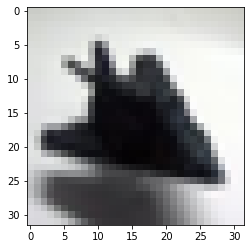

In [30]:
show_example(*dataset[0])

Label:  automobile (1)


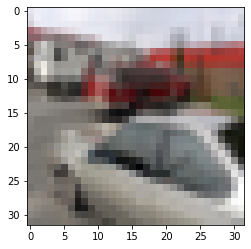

In [31]:
show_example(*dataset[9999])

#### Training and Validation Datasets

Training and Validation Datasets

실제 기계 학습 모델을 학습할 때 데이터 세트를 세 파트로 나누는 것이 일반적입니다.

* Training 세트 - 모델을 학습하는 데 사용됩니다. 즉, 경사 하강법을 사용하여 loss를 계산하고 모델의 가중치를 조정합니다.
* Validation 세트 - 훈련하는 동안 모델을 평가하고 하이퍼파라미터를 조정하여 모델의 최상의 버전을 선택하는 데 사용됩니다.
* Test 세트 - 다양한 모델 또는 다양한 유형의 접근 방식을 비교하고 모델의 최종 정확도를 보고하는 데 사용됩니다.

미리 정의된 Validation 세트가 없기 때문에 Validation 세트로 사용할 Training 세트의 일부분(5000개 을미지)을 별도로 설정하도록 하겠습니다. 이를 위해 PyTorch의 random_split을 사용합니다.

In [32]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

이제 Training 및 Validation을 위한 DataLoader를 생성하여 데이터를 배치로 로드할 수 있습니다.

In [33]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torchvision의 make_grid 메서드를 사용하여 데이터 세트에서 이미지 배치를 볼 수 있습니다. 샘플러가 배치를 생성하기 전에 인덱스를 섞기 때문에 다음 코드가 실행될 때마다 다른 배치를 얻습니다치

In [34]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

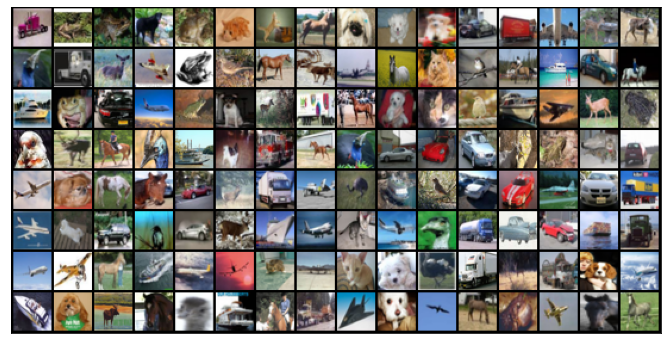

In [35]:
show_batch(train_dl)

#### Convolutional Neural Network

Defining the Model (Convolutional Neural Network)

이번 실습에서는 PyTorch내장의 nn.Conv2d클래스를 사용하여 Convolution network를 학습하도록 하겠습니다.


In [36]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif')

2D 컨볼루션은 본질적으로 매우 간단한 작업입니다. 단순히 가중치의 작은 행렬인 커널로 시작합니다. 이 커널은 2D 입력 데이터 위로 "슬라이드"하여 현재 있는 입력 부분과 요소별 곱셈을 수행한 다음 결과를 단일 출력 픽셀로 합산합니다.

In [37]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [38]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

다중 채널 이미지의 경우 각 채널에 다른 커널이 적용되고 출력이 픽셀 단위로 함께 추가됩니다.

이미지 데이터로 작업할 때 컨볼루션 레이어가 제공하는 특정 이점이 있습니다.

* Fewer Prameters: 전체 이미지의 출력을 계산하는 데 상대적으로 적은 매개변수 세트(커널)가 사용되므로 모델은 Fully-connected layer에 비해 파라미터 수가 적습니다
* Sparsity of Connections: 각 층에서 각 출력 요소는 적은 수의 입력 요소에만 의존하므로 정방향 및 역방향 전달이 더 효율적입니다.
* Parameter sharing and Spatial Invariance: 이미지의 한 부분에서 커널이 학습한 기능을 사용하여 다른 이미지의 다른 부분에서 유사한 패턴을 감지할 수 있습니다.

#### Pooling

Max-pooling 레이어를 사용하여 각 컨볼루션 레이어에서 출력 텐서의 높이와 너비를 점진적으로 줄입니다.

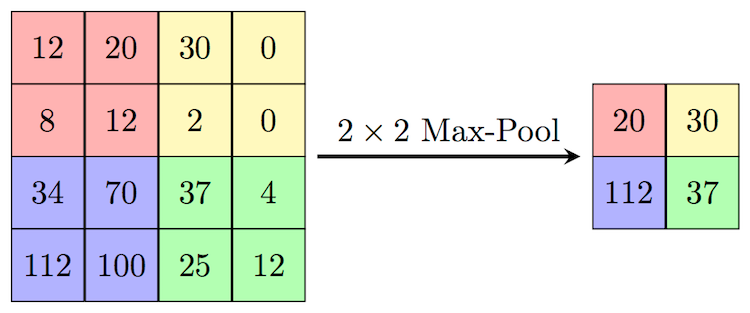

전체 모델을 정의하기 전에 단일 컨볼루션 레이어와 Max-pooling 레이어가 데이터에서 어떻게 작동하는지 살펴보겠습니다.

In [39]:
import torch.nn as nn
import torch.nn.functional as F

In [40]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [41]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


Conv2d 레이어는 3채널 이미지를 16채널 feature map으로 변환하고 MaxPool2d 레이어는 높이와 너비를 줄입니다. feature map은 더 많은 레이어를 추가함에 따라 점점 작아지고 후에는 평면화(flatten)할 수 있는 작은 피처 맵이 남게 됩니다. 그다음 fully-connected 레이어를 추가하여 각 이미지에 대해 크기 10의 벡터를 얻을 수 있습니다.

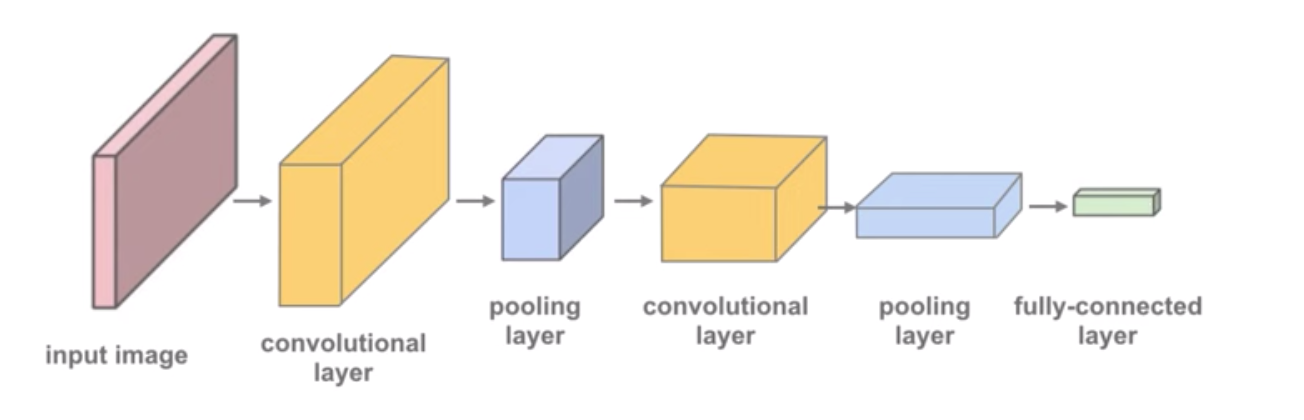

In [42]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [43]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [44]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

모델이 훈련 데이터 배치에서 예상 출력을 생성하는지 확인해 보겠습니다. 

각 이미지에 대한 10개의 출력은 (softmax를 적용한 후) 10개의 대상 클래스에 대한 확률로 해석될 수 있으며 확률이 가장 높은 클래스가 예측된 레이블로 선택됩니다.

In [45]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0329, -0.0046, -0.0045, -0.0148,  0.0243,  0.0015,  0.0483, -0.0074,
        -0.0203, -0.0226], grad_fn=<SelectBackward0>)


#### Device Setting

GPU를 원활하게 사용하기 위해 사용 가능한 함수 및 클래스를 미리 정의하여 필요에 따라 모델 및 데이터를 GPU로 이동합니다.

In [46]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [48]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

#### Training the Model

경사 하강법을 사용하여 모델을 훈련하고 Validation 세트에서 성능을 평가하기 위해 fit과 evaluate라는 두 가지 함수를 정의합니다.

In [49]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

학습을 시작하기 전에 모델을 다시 한 번 인스턴스화하고 초기 파라미터 세트를 사용하여 evaluation 세트에서 어떻게 수행되는지 살펴보겠습니다.

In [50]:
model = to_device(Cifar10CnnModel(), device)

In [51]:
evaluate(model, val_dl)

{'val_loss': 2.3032500743865967, 'val_acc': 0.0975758284330368}

초기 정확도는 약 10%이며, 이는 무작위로 초기화된 모델에서 기대할 수 있는 값입니다 (무작위로 추측하여 레이블을 올바르게 얻을 확률이 이/10이므로).

다음과 같은 하이퍼파라미터(learning rate, epoch, batch_size 등)를 사용하여 모델을 훈련합니다. 이것을 변경하여 더 짧은 시간에 더 높은 정확도를 달성할 수 있습니다.

In [52]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

이제 본격적으로 학습을 진행하도록 하겠습니다.

In [53]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.8411, val_loss: 1.4225, val_acc: 0.4645
Epoch [1], train_loss: 1.2671, val_loss: 1.0878, val_acc: 0.5981
Epoch [2], train_loss: 0.9800, val_loss: 0.9318, val_acc: 0.6644
Epoch [3], train_loss: 0.8131, val_loss: 0.8607, val_acc: 0.7005
Epoch [4], train_loss: 0.6818, val_loss: 0.7448, val_acc: 0.7374
Epoch [5], train_loss: 0.5684, val_loss: 0.8000, val_acc: 0.7267
Epoch [6], train_loss: 0.4821, val_loss: 0.7356, val_acc: 0.7597
Epoch [7], train_loss: 0.3924, val_loss: 0.7496, val_acc: 0.7645
Epoch [8], train_loss: 0.3140, val_loss: 0.8393, val_acc: 0.7654
Epoch [9], train_loss: 0.2559, val_loss: 0.8742, val_acc: 0.7509


Evaluation

우리의 모델은 약 75%의 정확도에 도달하는데, 그래프를 보면 오랜 시간 훈련을 해도 모델이 80% 이상의 정확도를 달성할 가능성은 없어 보입니다. 이는 이미지와 라벨 간의 관계를 보다 정확하게 포착하기 위해 보다 강력한 모델을 사용해야 할 수도 있음을 시사합니다. 모델에 더 많은 컨볼루션 레이어를 추가하거나 각 컨볼루션 레이어의 채널 수를 늘리거나 regularization 기술을 사용하는 등 다양한 방식을 수행해볼 수 있습니다.

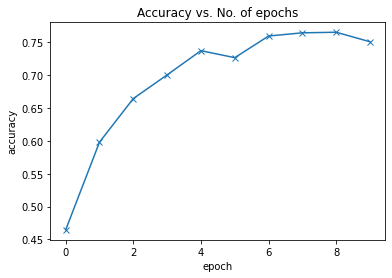

In [54]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

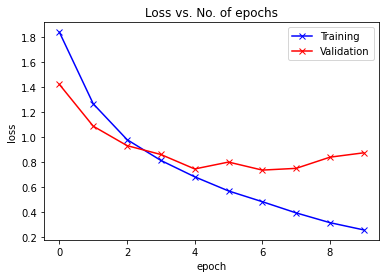

In [55]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

처음에는 훈련 및 검증 손실이 모두 시간이 지남에 따라 감소하는 것으로 보입니다. 그러나 모델을 충분히 오래 훈련하면 훈련 손실이 계속 감소하는 반면 유효성 검사 손실은 감소를 멈추고 특정 시점 이후에는 증가하기 시작합니다.

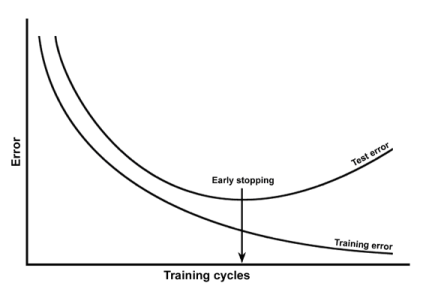

이러한 현상을 과적합이라고 하며, 많은 기계 학습 모델이 실제 데이터에 대해 좋지 않은 결과를 제공하는 대표적인 이유입니다. 모델이 손실을 최소화하기 위해 학습 데이터에 고유한 패턴을 학습하기 시작하고 때로는 특정 학습 예제를 기억하기 때문에 발생합니다. 이 때문에 모델은 이전에 본 적이 없는 데이터로 잘 일반화되지 않습니다.

다음은 과적합을 방지하기 위한 몇 가지 일반적인 전략입니다.

* 더 많은 Training 데이터를 수집 및 생성하거나 데이터에 노이즈 추가
* Batch normalization 및 Dropout과 같은 Regularization 기술 사용
* Evaluation loss가 증가하기 시작하면 모델 학습을 조기에 중지합니다.

#### Testing

지금까지 모델의 전반적인 정확도를 추적했지만 일부 샘플 이미지에서 모델의 결과를 살펴보는 것도 좋은 방법입니다. 미리 정의된 10000개 이미지의 테스트 데이터 세트에서 일부 이미지로 모델을 테스트해 보겠습니다. ImageFolder 클래스를 사용하여 테스트 데이터 세트를 만드는 것으로 시작합니다.

In [56]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

그리고 함수를 정의하여 단일 이미지 텐서에서의 확인을 용이하게 해보도록 하겠습니다.

In [57]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


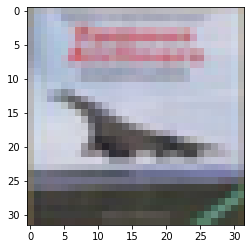

In [58]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


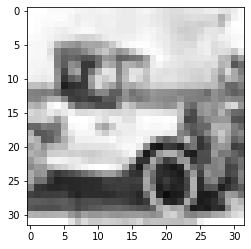

In [59]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


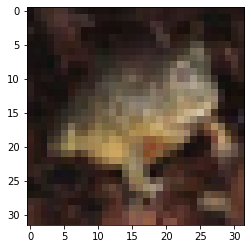

In [60]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [61]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8931133151054382, 'val_acc': 0.753222644329071}

마지막으로 인터넷에 있는 다른 이미지를 통해서 CIFAR10 데이터뿐만 아니라 다른 데이터에서도 잘 동작하는지 살펴보겠습니다.

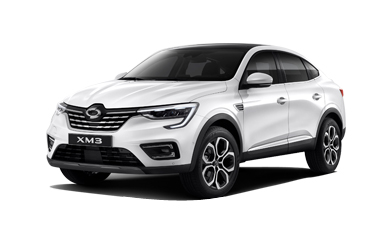

In [64]:
from PIL import Image

# 다운받을 이미지 url
url = "https://dzqerse1lankl.cloudfront.net/carsdata/cars/cm_cardb/file/3bebfa8e-8a58-48be-9127-61751389b007.jpg"

# curl 요청
os.system("curl " + url + " > car.jpg")

# 저장 된 이미지 확인
img = Image.open("car.jpg").convert('RGB')
img

In [75]:
import torchvision.transforms as transforms

# set up transformation to resize the image
resize = transforms.Resize([32, 32])
img = resize(img)
to_tensor = transforms.ToTensor()
tensor = to_tensor(img)

print(tensor.size())

# add another dimension at the front to get NCHW shape
img_tensor = tensor.unsqueeze(0)
print(tensor.size())

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


Predicted: automobile


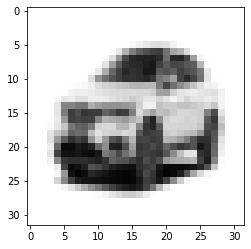

In [78]:
plt.imshow(tensor.permute(1, 2, 0))
out = model(img_tensor.to(device))
_, preds  = torch.max(out, dim=1)
print(f'Predicted: {dataset.classes[preds[0].item()]}')

#### Saving and Loading the model

모델을 훈련시켰고 합리적인 정확도를 달성했기 때문에 나중에 모델을 재사용하고 처음부터 다시 훈련하지 않도록 모델의 가중치를 디스크에 저장하는 것이 좋습니다.

 모델을 저장하는 방법은 다음과 같습니다.

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

.state_dict 메서드는 모델의 속성에 매핑된 모든 weight 및 bias 행렬을 포함하는 OrderedDict를 반환합니다. 모델 가중치를 로드하기 위해 동일한 구조로 모델을 재정의하고 .load_state_dict 메서드를 사용할 수 있습니다.

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

In [ ]:
evaluate(model2, test_loader)

### 이전 실습 코드 재확인

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
# 새로운 CNN모델을 정의합니다.
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

model2 = CNN().to(device)
print(model2)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2048, out_features=625, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=2048, out_features=625, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Linear(in_features=625, out_features=10, bias=True)
)


In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-4)

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.290728  [    0/60000]
loss: 1.015746  [ 6400/60000]
loss: 0.558476  [12800/60000]
loss: 0.739449  [19200/60000]
loss: 0.604277  [25600/60000]
loss: 0.516967  [32000/60000]
loss: 0.496321  [38400/60000]
loss: 0.673373  [44800/60000]
loss: 0.610830  [51200/60000]
loss: 0.479982  [57600/60000]
Test Error: 
 Accuracy: 82.2%, Avg loss: 0.493333 

Epoch 2
-------------------------------
loss: 0.359212  [    0/60000]
loss: 0.497386  [ 6400/60000]
loss: 0.348501  [12800/60000]
loss: 0.521015  [19200/60000]
loss: 0.436350  [25600/60000]
loss: 0.426649  [32000/60000]
loss: 0.400731  [38400/60000]
loss: 0.609798  [44800/60000]
loss: 0.554374  [51200/60000]
loss: 0.418501  [57600/60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.438570 

Epoch 3
-------------------------------
loss: 0.272194  [    0/60000]
loss: 0.419492  [ 6400/60000]
loss: 0.299413  [12800/60000]
loss: 0.466287  [19200/60000]
loss: 0.361871  [25600/60000]
loss: 0.397651  [32000/600

In [10]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model2, loss_fn, optimizer2)
    test(test_dataloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.323070  [    0/60000]
loss: 1.094793  [ 6400/60000]
loss: 0.681558  [12800/60000]
loss: 0.866024  [19200/60000]
loss: 0.695788  [25600/60000]
loss: 0.622615  [32000/60000]
loss: 0.616621  [38400/60000]
loss: 0.579663  [44800/60000]
loss: 0.639697  [51200/60000]
loss: 0.564631  [57600/60000]
Test Error: 
 Accuracy: 82.1%, Avg loss: 0.497491 

Epoch 2
-------------------------------
loss: 0.375487  [    0/60000]
loss: 0.516101  [ 6400/60000]
loss: 0.283333  [12800/60000]
loss: 0.563391  [19200/60000]
loss: 0.431980  [25600/60000]
loss: 0.475054  [32000/60000]
loss: 0.416520  [38400/60000]
loss: 0.543526  [44800/60000]
loss: 0.555977  [51200/60000]
loss: 0.421209  [57600/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.395258 

Epoch 3
-------------------------------
loss: 0.276258  [    0/60000]
loss: 0.371525  [ 6400/60000]
loss: 0.228431  [12800/60000]
loss: 0.492971  [19200/60000]
loss: 0.388985  [25600/60000]
loss: 0.425280  [32000/600